In [5]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
#Load Dataset
data2=pd.read_csv('C:/Users/Owner/Desktop/Durham/Semester 1/Introduction to Data Analytics/Notes/Final Project/studentperf.csv')
data2.head()

,Method,satis,time,ability,prvperf,Outcome
0,1,5,22,13,26.5,1
1,1,4,12,27,19.6,0
2,1,2,22,18,26.4,1
3,1,5,20,18,25.1,0
4,1,4,22,29,28.0,1


In [9]:
#Dropping model column
#data2=data.drop('model',axis=1)

#Show Key Statistics
data2.describe()

,Method,satis,time,ability,prvperf,Outcome
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2.000000,4.966667,18.533333,29.216667,22.796667,0.450000
std,0.823387,1.813010,3.586541,11.295854,3.262367,0.501692
min,1.000000,1.000000,12.000000,7.000000,16.000000,0.000000
25%,1.000000,4.000000,16.000000,22.000000,20.375000,0.000000
50%,2.000000,5.000000,18.000000,29.500000,22.700000,0.000000
75%,3.000000,6.000000,22.000000,37.250000,25.225000,1.000000
max,3.000000,9.000000,26.000000,49.000000,32.800000,1.000000


<AxesSubplot:>

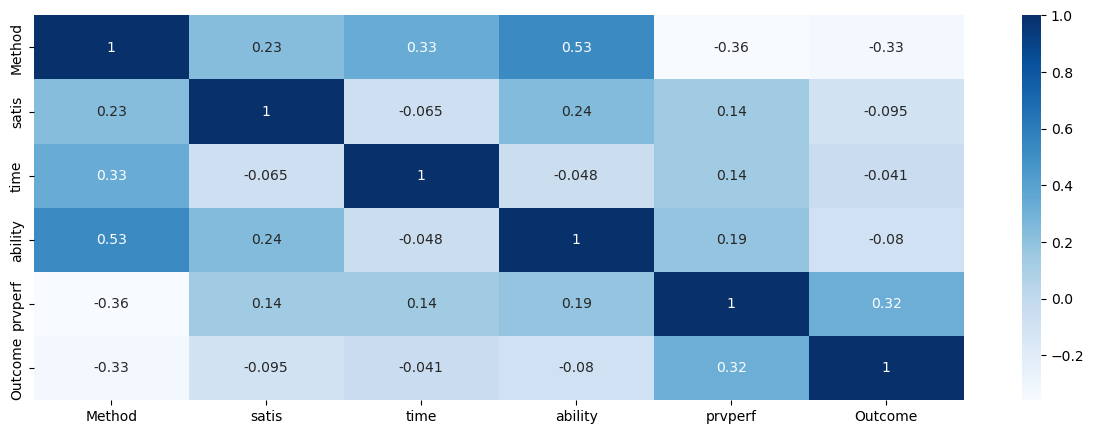

In [10]:
#Visualization of Correlations
fig = plt.figure(figsize=(15,5))
sns.heatmap(data2.corr(),annot=True,cmap="Blues")

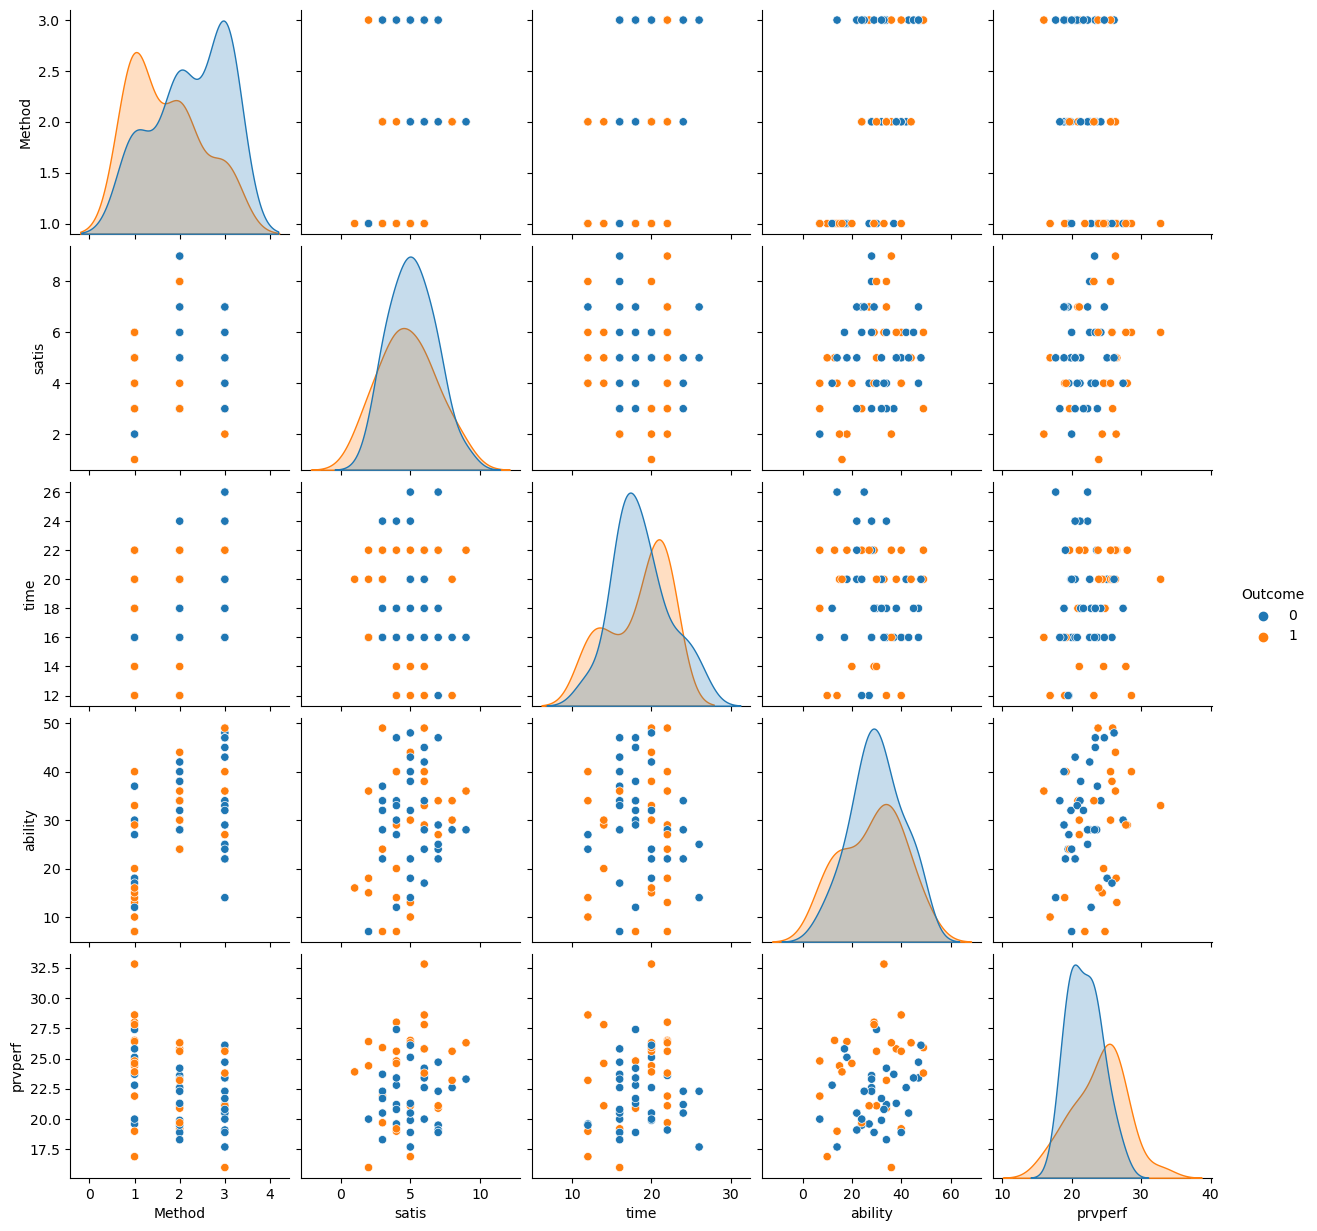

In [11]:
# Pairplot with hue=species
sns.pairplot(data2, hue ='Outcome')

In [13]:
#Define x and y variable
x = data2.drop('Outcome',axis=1).to_numpy()
y = data2['Outcome'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify= y,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [14]:
#Script for Linear Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics  

#Script for SVM and NB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neural_network import MLPClassifier 

#Script for Logistical Regressionfrom 
for name,method in [('Logistic Regression', LogisticRegression(random_state=100))]:
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['Class 0','Class 1']
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict,target_names=target_names))

[[4 3]
 [3 2]]
              precision    recall  f1-score   support

     Class 0       0.57      0.57      0.57         7
     Class 1       0.40      0.40      0.40         5

    accuracy                           0.50        12
   macro avg       0.49      0.49      0.49        12
weighted avg       0.50      0.50      0.50        12



In [15]:
for name,method in [('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['0','1']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))


Estimator: Naive Bayes
[[5 2]
 [3 2]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.50      0.40      0.44         5

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.57      0.58      0.57        12



In [16]:
mlp =MLPClassifier(hidden_layer_sizes=(5,3,2),
activation='relu',solver='adam',
max_iter=10000,random_state=100)
  
mlp.fit(x_train2, y_train) 
predictions = mlp.predict(x_test2) 

#Evaluation Report and Matrix
from sklearn.metrics import classification_report, confusion_matrix  
target_names=['0','1']
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions,target_names=target_names))

[[5 2]
 [4 1]]
              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.33      0.20      0.25         5

    accuracy                           0.50        12
   macro avg       0.44      0.46      0.44        12
weighted avg       0.46      0.50      0.47        12

